In [1]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def pandaFramer(FILE_NAME, STATIC_FOLDER=''):
    """ RETURNS PANDAS DATAFRAME, REQUIRES FILENAME WITH .CSV EXTENSION 
    ALSO STATIC_FOLDER IF ANY DEFAULT NONE """
    BASE_DIR = os.getcwd()
    PATH_COMPILED = os.path.join(BASE_DIR, STATIC_FOLDER, FILE_NAME)
    _df = pd.read_csv(PATH_COMPILED, encoding="iso-8859-1", low_memory=False)
    return _df

In [3]:
DESC_FILE_NAME = 'fire_data_description.csv' # CONSTANT
desc_fire_df = pandaFramer(DESC_FILE_NAME)
# desc_fire_df.head()

In [4]:
FIRE_DATA_FILENAME = 'fire_county_data.csv'
fire_df = pandaFramer(FIRE_DATA_FILENAME)
responseTime_df = fire_df[[
    'Property Use Category',
    'Total First Unit Response Time'
]].dropna()
responseTime_df['responseTime'] = responseTime_df['Total First Unit Response Time']
responseTime_df.drop(columns='Total First Unit Response Time', inplace=True)

In [21]:
# groupby -> mean doesnot work yet. dtype is non-numeric
responseTime_df['responseSumSeconds'] = [ int(int(dt.datetime.strptime(response,'%H:%M:%S').hour)*3600 + int(dt.datetime.strptime(response,'%H:%M:%S').minute)*60 + int(dt.datetime.strptime(response,'%H:%M:%S').second))
    for response in responseTime_df['responseTime']
]
resPrpCtgFocused_df = responseTime_df.groupby('Property Use Category').mean().__round__(0)
resPrpCtgFocused_df['responseSumSeconds'] = [int(second) 
                                             for second in resPrpCtgFocused_df['responseSumSeconds']
                                            ]
resPrpCtgFocused_df.sort_values(by= ['responseSumSeconds'], ascending=False, inplace=True)

In [26]:
def propertyResponseTimer(_df = resPrpCtgFocused_df):
    plt.figure(figsize=(16,10))
    plt.rcParams["font.size"] = 14
    plt.grid()
    plt.title("Response Time vs Property Use Category")
    plt.xlabel('Response Time In Seconds')
# parameter: create an axis with all around average
    x_axis = _df.index
    y_axis = _df['responseSumSeconds']
    plt.barh(x_axis, y_axis, alpha = 0.45, align='center')
    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


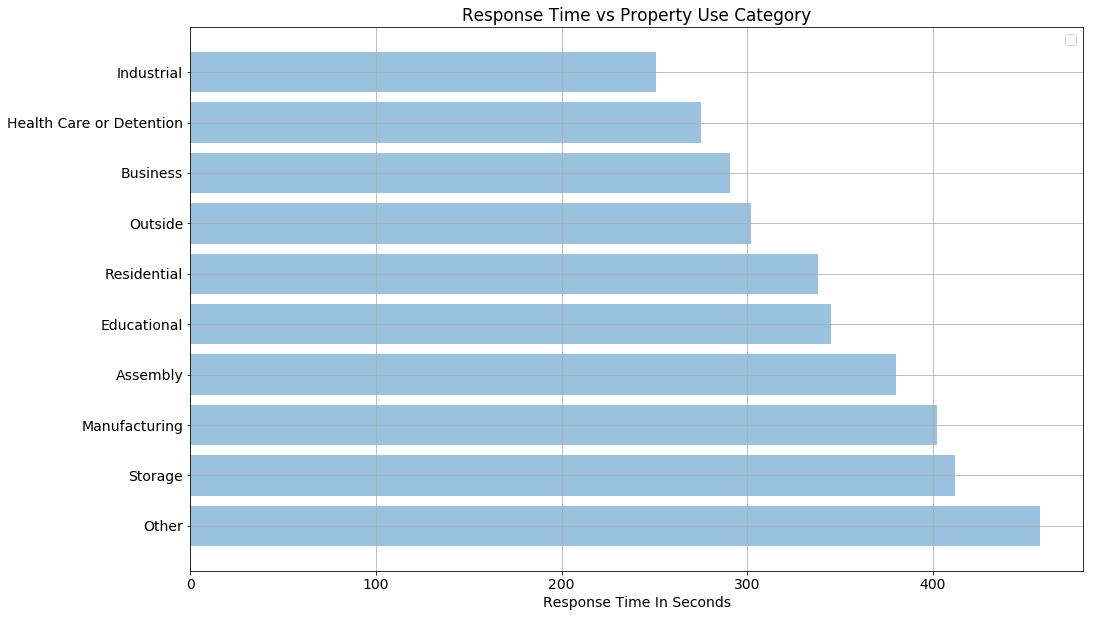

In [27]:
propertyResponseTimer()